# Utilities

## Imports

In [78]:
#pip install pandas
#pip install numpy
#pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


## Methods

### Euclidean distance

In [79]:
def distancia_euclidea(x, y):
    return np.sqrt(np.sum((x - y)**2))


##### Next method paints all neighbors whose  distance is the same to A and B. Such distance is calculated  by using each point as a center of a circumference and the euclidean distance among them as the radius.

In [80]:
def visualizar_distancia(punto_a, punto_b, ver_radio = False):
    
    # Pintar los dos puntos
    plt.scatter(*punto_a, c='red', marker='o', label='A')
    plt.scatter(*punto_b, c='blue', marker='o', label='B')

    # Dibujar una línea entre los puntos
    plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_b[1]], linestyle='--', color='gray')

    # Calcular la distancia euclídea
    distance = distancia_euclidea(punto_a, punto_b)

    # Calcular el ángulo de rotación de la línea para escribir el texto
    angle = np.arctan2((punto_b[1] - punto_a[1]), (punto_b[0] - punto_a[0])) * (180 / np.pi) 

    # Calcular el centro de la línea para escribir el texto
    midpoint = [(punto_a[0] + punto_b[0]) / 2, (punto_a[1] + punto_b[1]) / 2] 

    # Escribir la distancia entre los dos puntos
    plt.text(midpoint[0], midpoint[1], f'Distancia: {distance:.2f}', ha='center', va='bottom', rotation=angle)

    if ver_radio:

        # Añadir círculos con la distancia euclídea
        circle = plt.Circle(punto_a, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='red')
        plt.gca().add_patch(circle)
        circle = plt.Circle(punto_b, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='blue')
        plt.gca().add_patch(circle)

    plt.title('Distancia euclídea')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.xlim(0,1) # rango eje x
    plt.ylim(0,1) # rango eje y
    
    # Hacer los ejes en la misma magnitud
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Sacar la leyenda de la caja principal
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# visualizar_distancia(punto_a, punto_b)
# visualizar_distancia(punto_a, punto_b, ver_radio = True)



### Next method shows the k nearest neighbors only.

In [81]:

# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter

def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0], 
                X_train[:, 1],
                c=y_train, 
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0], 
                X_train[indices_vecinos, 1], 
                facecolors='none', 
                edgecolors='red', # rodear en rojo
                linewidths=2, 
                s=100, 
                label='Nearest neighbors')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0], 
                dato_nuevo[1], 
                c=clase, 
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Nearest neighbors {}'.format(np.round(dato_nuevo, 2)))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

# Recibe un conjunto de datos de entrenamiento junto con sus etiquetas reales, el nuevo dato que queremos clasificar y el número de vecinos que seleccionamos para hacerlo
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

    # Obtener todas las distancias
    distances = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

    # Seleccionar los objetos k más cercanos
    k_indices = np.argsort(distances)[:k]

    # Asignar las etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Seleccionar la clase a la que se asigna, 
    # que es la etiqueta más común entre los vecinos más cercanos
    most_common = Counter(k_nearest_labels).most_common(1)

    # Visualizar la iteración
    visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, most_common[0][0])

    # Devolver la clase
    return most_common[0][0]

# Realizamos la clasificación para todos los datos del conjunto de test
def aplicar_kNN_datos_nuevos(X_test, X_train, y_train, k=3):
    
    # Crear un array inicialmente vacío para almacenar las classes en cada iteración
    predicted_labels = np.empty(X_test.shape[0], dtype=int)

    # Clasficar cada punto del conjunto de test
    for i, x_test in enumerate(X_test):
        predicted_labels[i] = clasificar_dato_usando_knn(X_train, y_train, x_test, k)

    # Almacenar para cada objeto la clase que se le ha asignado
    df = pd.DataFrame(X_test)
    df['pred_class'] = predicted_labels

    return df


# K NEAREST NEIGHBORS ALGORITHM

### Using pandas


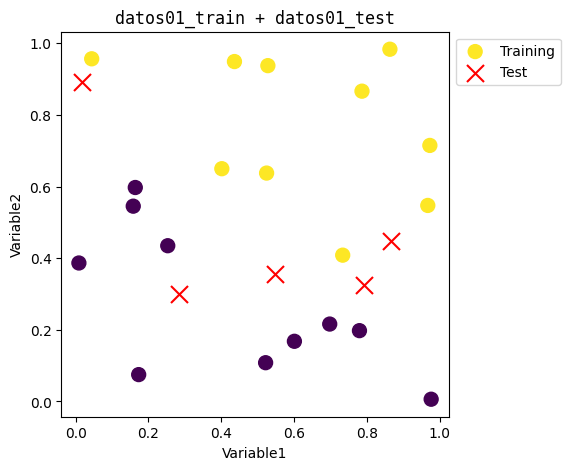

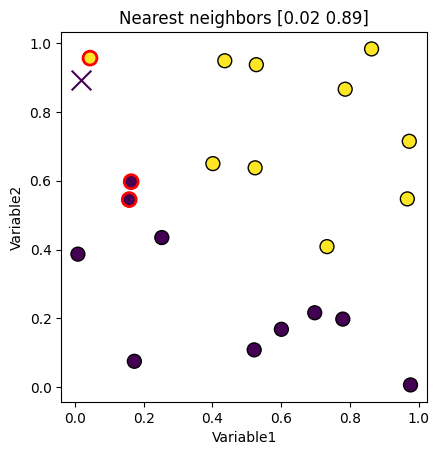

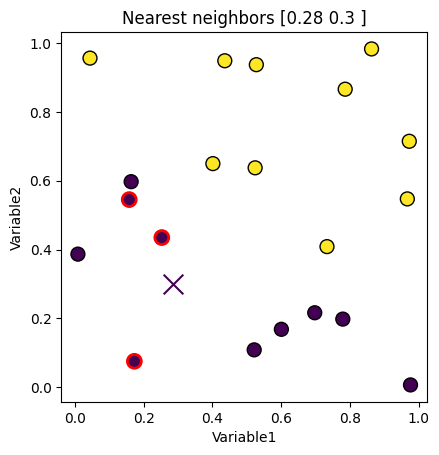

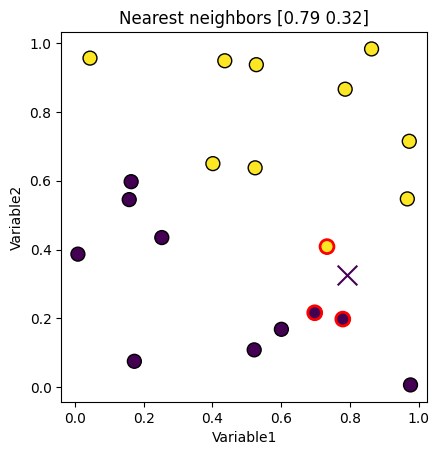

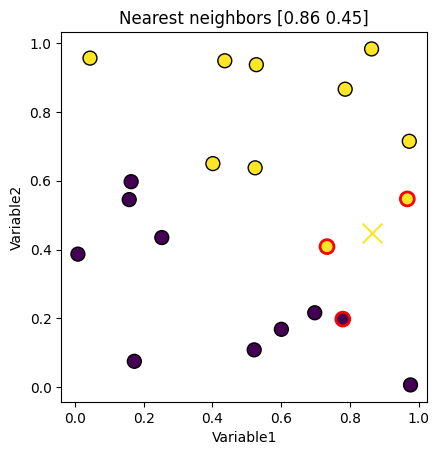

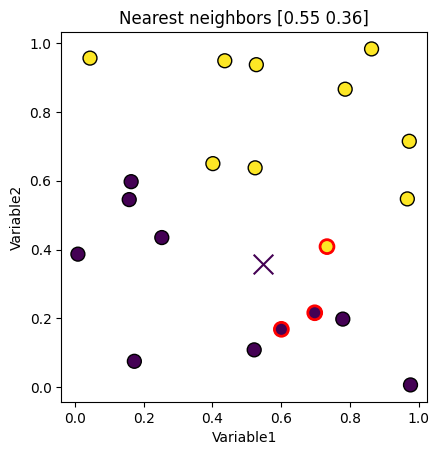

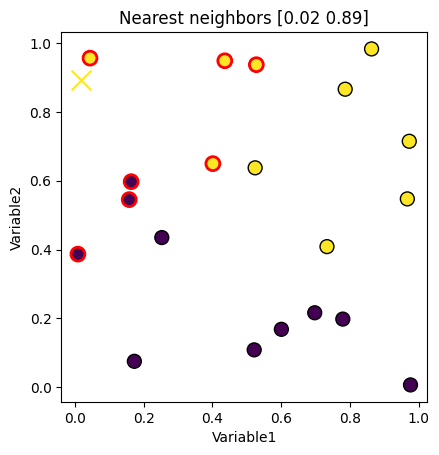

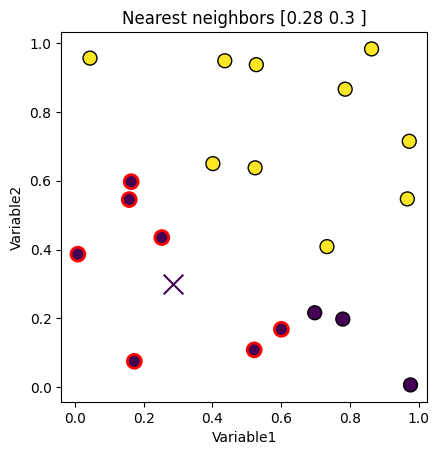

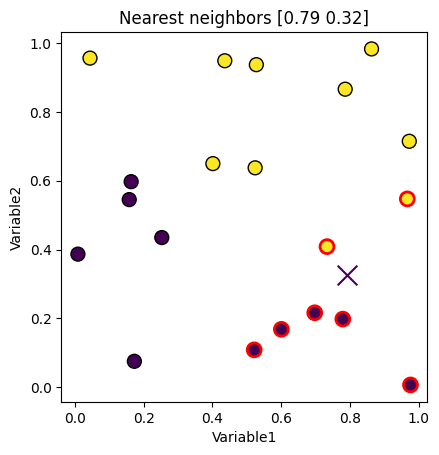

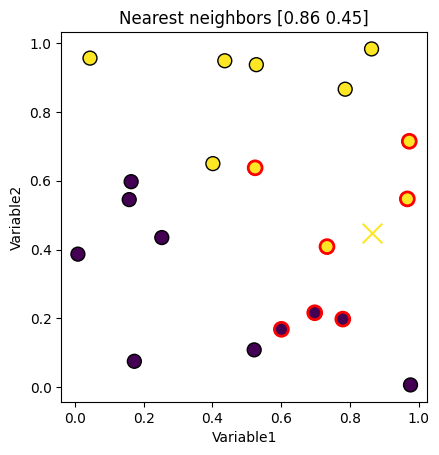

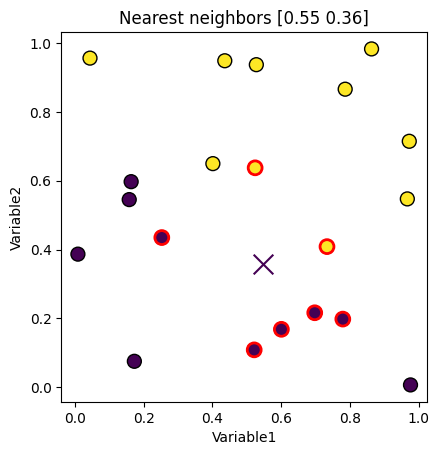

0         1  pred_class
0  0.017490  0.891573           1
1  0.284861  0.298976           0
2  0.792034  0.324471           0
3  0.864710  0.447513           1
4  0.548230  0.357172           0

In [82]:
# We will assume that the closest neighbors will be more similar to the example we want to classify than further ones.

#First we load the data:

#training data

df = pd.read_csv('datos/datos01_train.csv')


# We separate variables(x) from labels (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

#test data
 
df_test = pd.read_csv('datos/datos01_test.csv')

# We separate variables(x) from labels (y)
X_test = df_test[['Variable1', 'Variable2']]

#Now we compute the likeness between the new example and the existing data
plt.figure(figsize=(5, 5))

# We paint the trainig set first.
plt.scatter(df['Variable1'], 
            df['Variable2'], 
            c=df['Clase'], 
            s=100, 
            label='Training')

# Now we paint the validation test
plt.scatter(df_test['Variable1'], 
            df_test['Variable2'], 
            color='red', 
            marker='x', # we make them appear as crosses instead of points to enhance differentitation
            s=150, 
            label='Test')

plt.title('datos01_train + datos01_test', family='monospace')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#APPLYING K=3 NEAREST NEIGHBORS.-> WE DONT NEED TO SPECIFY THAT K=3 BECAUSE ITS SET AS A DEFAULT VALUE.
resultados_k3 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values) #We apply the algorithm to the validation data.
resultados_k3

#APPLYING =7 NEAREST NEIGHBORS. 
resultados_k7= aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values,7) #We apply the algorithm to the validation data.
resultados_k7

### Using Sklearn


In [83]:
from sklearn.neighbors import KNeighborsClassifier

# We instantiate a new KNeighborsClassifier object that will represent our model
modelo = KNeighborsClassifier(n_neighbors=3)
# then , we adjust the model to the training data 
modelo.fit(X, y)

#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
modelo.predict(X_test)

#in case we would like to see the probabilty each element has to belong to one class or another..
#modelo.predict_proba(X_test)


#results are given inside an array of vectors.

#IN ORDER TO SEE WHICH PARAMETERS ARE BEING USED TO TRAIN THE MODEL: 
#modelo.get_params()
"""
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
  'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2, 
 'weights': 'uniform'}
"""


"\n{'algorithm': 'auto',\n 'leaf_size': 30,\n 'metric': 'minkowski',\n  'metric_params': None,\n 'n_jobs': None,\n 'n_neighbors': 3,\n 'p': 2, \n 'weights': 'uniform'}\n"

### Validation
Now that we have fit our model to the data , we need to measure how good it is. For that, we will take a file where test data has been  classified already, so we can compare our model's results to the actual class those data should have be given. 

In [84]:
y_test = pd.read_csv('datos/datos01_test_etiquetas.csv')
#print(y_test.values)
y_test = y_test.values.ravel()
y_test

array([0, 0, 1, 1, 0], dtype=int64)

In [85]:
#Make our model guess the class each data belongs to.
y_pred = modelo.predict(X_test)
y_pred


array([0., 0., 0., 1., 0.])

we notice that the model fails classifying the fourth element (I=3)

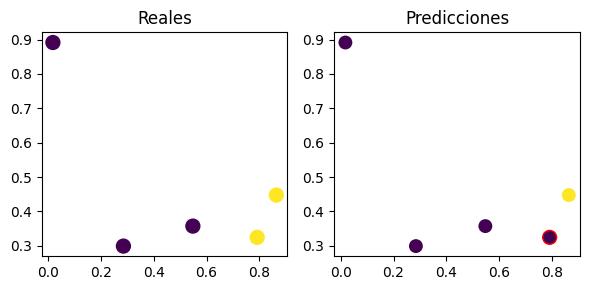

In [86]:
# To display two different plots inside the same figure.
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# real class plot
axes[0].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_test, 
                s=100)
axes[0].set_title('Reales')

# class prediction plot

ec = np.array(['none'] * len(df_test)) 
 
ec[y_test != y_pred] = 'r' #surround by a red line each example that has not been predicted corrrectly
# paint predictions inside their
axes[1].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

# Model's goodness-of-fit
In order to check how well does our model classify new data, we will use the confussion matrix.

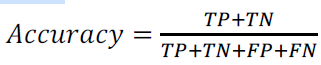

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix

# To evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

Accuracy: 0.80
Matriz de confusión:
 [[3 0]
 [1 1]]


### Exercise
Using datos02... train a model and visualize the results. Compute accuracy's value using the corresponding test data (and their corresponding labels).
After, train another model using Manhattan distance as a metric.

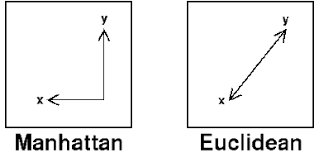

In [88]:
# We will assume that the closest neighbors will be more similar to the example we want to classify than further ones.

#First we load the data:

#training data

df = pd.read_csv('datos/datos02_train.csv')


# We separate variables(x) from labels (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

#test data
 
df_test = pd.read_csv('datos/datos02_test.csv')

# We separate variables(x) from labels (y)
X_test = df_test[['Variable1', 'Variable2']]


#USING DATASET 02
 #We instantiate a new KNeighborsClassifier object that will represent our model
model = KNeighborsClassifier(n_neighbors=3)
# then , we adjust the model to the training data 
model.fit(X, y)

#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
y_classification_results=model.predict(X_test)
y_actual_labels=pd.read_csv('datos/datos02_test_etiquetas.csv')
accuracy=accuracy_score(y_classification_results,y_actual_labels);
confmatrix=confusion_matrix(y_classification_results,y_actual_labels);
print("Results for the euclidean distance metric:")
print(accuracy);
print( confmatrix);

#USING MANHATTAN DISTANCE 
manhattan_model=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
manhattan_model.fit(X,y)


#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
y_manhattan_classification_results=manhattan_model.predict(X_test)
 
accuracy_mnh=accuracy_score(y_manhattan_classification_results,y_actual_labels);
confmatrix_mnh=confusion_matrix(y_manhattan_classification_results,y_actual_labels);

print("Results for the manhattan distance metric:")
print(accuracy_mnh);
print(confmatrix_mnh);


Results for the euclidean distance metric:
1.0
[[3 0]
 [0 2]]
Results for the manhattan distance metric:
0.8
[[2 0]
 [1 2]]


Results indicate that manhattan distance is less accurate as a metric for this problem. It makes sense , since euclidean distance gives us the SHORTEST distance between two points, while manhattan does not. That means that some of the neighbors was identified as less similar ( further) when it was actually closer, and therefore , other, actually further and less similar neighbor was used.

## APPLYING KNN TO MULTIVARIATE DATA.

In [89]:
df_train = pd.read_csv('datos/datos03_train.csv')
df_train.info()

df_train.describe()# WILL SHOW DEATILED INFO-> NUMERIC VARIABLES ONLY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x.1     1600 non-null   float64
 1   x.2     1600 non-null   float64
 2   x.3     1600 non-null   float64
 3   x.4     1600 non-null   float64
 4   Clase   1600 non-null   object 
dtypes: float64(4), object(1)
memory usage: 62.6+ KB


x.1          x.2          x.3          x.4
count  1600.000000  1600.000000  1600.000000  1600.000000
mean      0.008112    -0.017286    -0.024780    -0.003261
std       0.578455     0.576607     0.569985     0.572191
min      -0.999401    -0.999467    -0.999575    -0.997903
25%      -0.458114    -0.522156    -0.514393    -0.485499
50%      -0.004972    -0.022612    -0.045641    -0.017759
75%       0.512347     0.463921     0.452209     0.482743
max       0.999711     0.999206     0.997743     0.999351

### To observe data distribution we will use seaborn

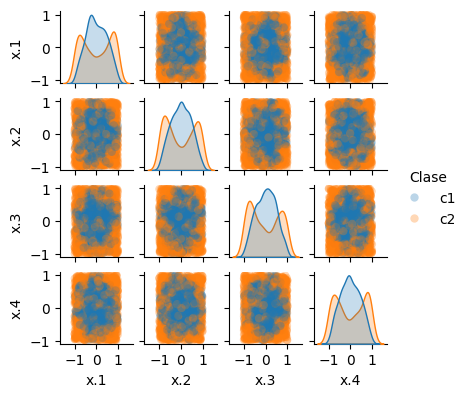

In [90]:
import seaborn as sns

df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2']) # Transform Object data into the specified Categorical variables

sns.pairplot(df_train, # dataset
            hue='Clase', #  variable we want coloured. In this case, the variables.
            height=1,  
            aspect=1,  #Graph proportions. (squared)
            plot_kws={ # aesthetic parameters
                'alpha':0.3, # transparency
                'edgecolor': 'none' # remove edges from each point.
            })

plt.show()

In [91]:
#We define the model
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train['Clase'].values.ravel()
#then  proceed to train  it
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

# Laod the TEST dataset.
df_test = pd.read_csv('datos/datos03_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].values.ravel()
#Since this is supervised learning, we will have access to the real class each data should've been classified as.

#### To observe data distribution after training

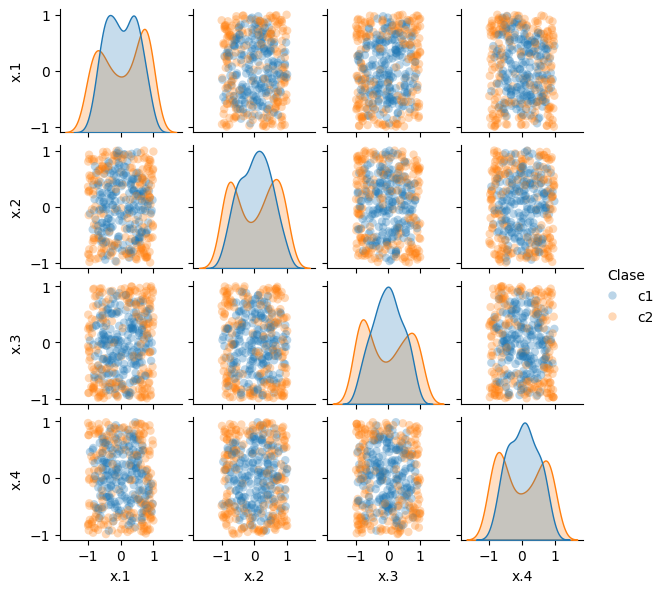

In [92]:
df_test['Clase'] = pd.Categorical(df_test['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_test, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
#plt.show()

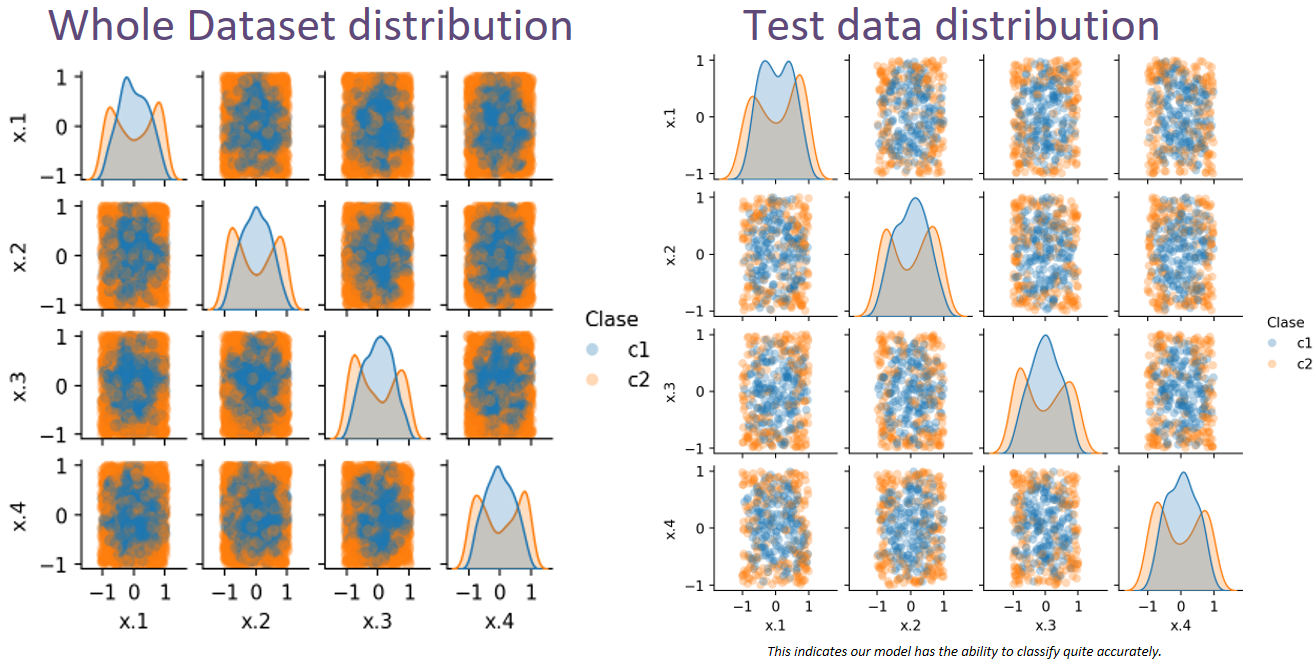


##### Classification and model evaluation

In [93]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confussion matrix:\n', conf_matrix)

Accuracy: 0.90
Confussion matrix:
 [[190  13]
 [ 29 168]]


## UTILITY METHOD TO TRAIN AND EVALUATE A MODEL:


In [94]:
def train_and_get_accuracy(X_train, y_train, X_test, y_test, k=3):
    model  = KNeighborsClassifier(n_neighbors=k)
    model .fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Confussion matrix:\n', conf_matrix)
    return modelo, y_pred #Returns the model and the set of classes the model has assigned each example.

#model, y_pred = train_and_get_accuracy(X_train, y_train, X_test, y_test)

# Noise Sensitivity
#### Describe() is also useful for detecting noisy datasets, since it displays statistic measures regarding data disperion, deviation..
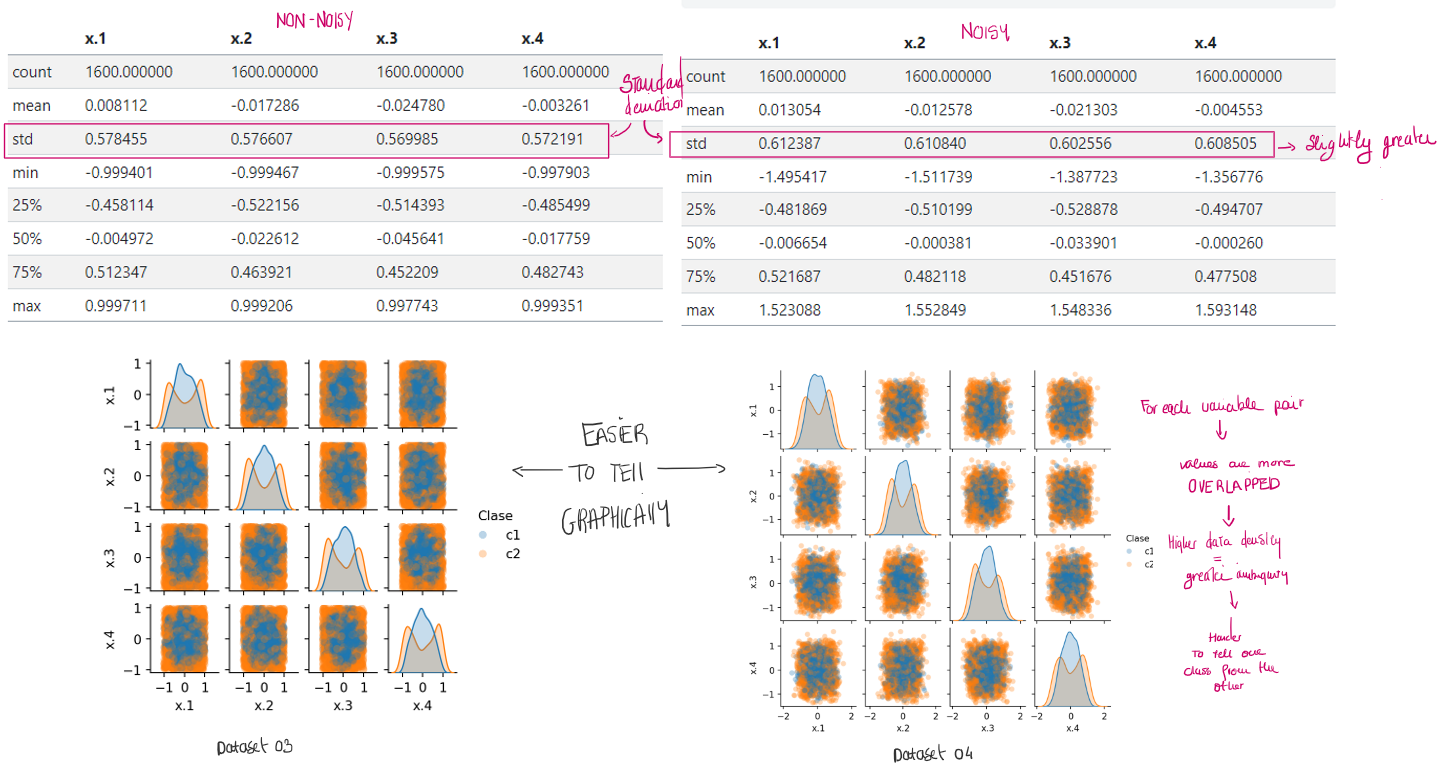

               x.1          x.2          x.3          x.4
count  1600.000000  1600.000000  1600.000000  1600.000000
mean      0.013054    -0.012578    -0.021303    -0.004553
std       0.612387     0.610840     0.602556     0.608505
min      -1.495417    -1.511739    -1.387723    -1.356776
25%      -0.481869    -0.510199    -0.528878    -0.494707
50%      -0.006654    -0.000381    -0.033901    -0.000260
75%       0.521687     0.482118     0.451676     0.477508
max       1.523088     1.552849     1.548336     1.593148
(1600, 5)


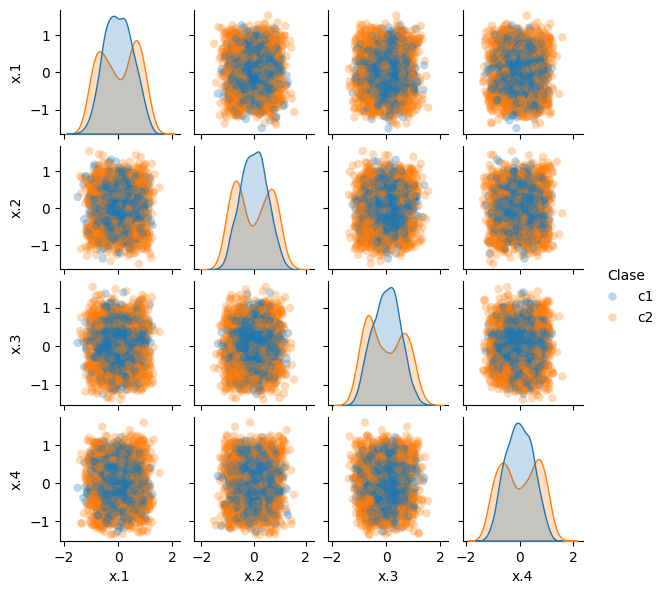

Accuracy: 0.74
Confussion matrix:
 [[159  44]
 [ 60 137]]


In [95]:
#TRAINING DATASET
df_train = pd.read_csv('datos/datos04_train.csv')
print(df_train.describe())
print(df_train.shape)
# TESTING DATASET
df_test = pd.read_csv('datos/datos04_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].to_numpy().ravel()
#Detail on variable statistical metrics
df_train.describe()
# Comparing clases by pairs
df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

#MODEL TRAINING
# Dividir el conjunto de datos en variables (X) y clase (y):
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train[['Clase']].to_numpy().ravel()
# Entrenar el modelo
modelo, y_pred = train_and_get_accuracy(X_train, y_train, X_test, y_test)



#### Accuracy has gone from 0.9 (dataset 03) to 0.79 (dataset 04)!
KNN is greatly affected by noise

### Noise can also be detected when variables appear not to follow any pattern nor generalize correclty to new data.

To demonstrate that, we will will add completely random data to a non noisy model (the one we generated for dataset 03 , which was not noisy)

In [96]:
#we will initialize df_train and test to the data in 03.
df_train = pd.read_csv('datos/datos03_train.csv')
df_test = pd.read_csv('datos/datos03_test.csv')

np.random.seed(29) # We use a seed to be able to reproduce the "randomness"

# We add five columns populated by completely random data
for i in range(1, 6):
    column_name = f'new_variable_{i}'
    df_train[column_name] = np.random.randn(len(df_train)) 
    df_test[column_name] = np.random.randn(len(df_test))
'''
 #to Display data comparisson graphically
df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()
''' 
#TRAINING DATA
X_train = df_train.drop('Clase', axis = 1).values
y_train = df_train[['Clase']].to_numpy().ravel()

# TESTING DATA
X_test = df_test.drop('Clase', axis = 1).values
y_test = df_test[['Clase']].values

model, y_pred = train_and_get_accuracy(X_train, y_train, X_test, y_test)

Accuracy: 0.62
Confussion matrix:
 [[162  41]
 [111  86]]


## Again , acuraccy is lowered. 
These new, non significant random variables are used when computing distance (=likeness). So they will distort the classification of the examples.
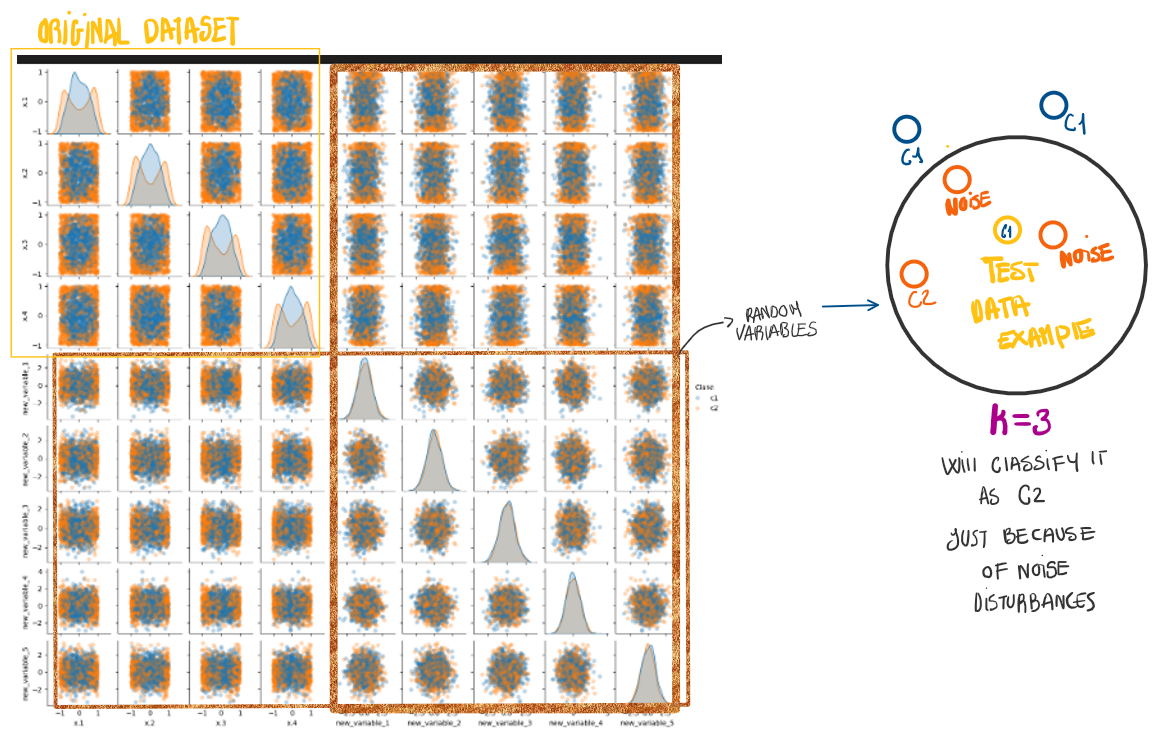

# Preprocessing
## Scale
If data is not scaled properly, some neighbors might appear closer / more similar than how they really are.
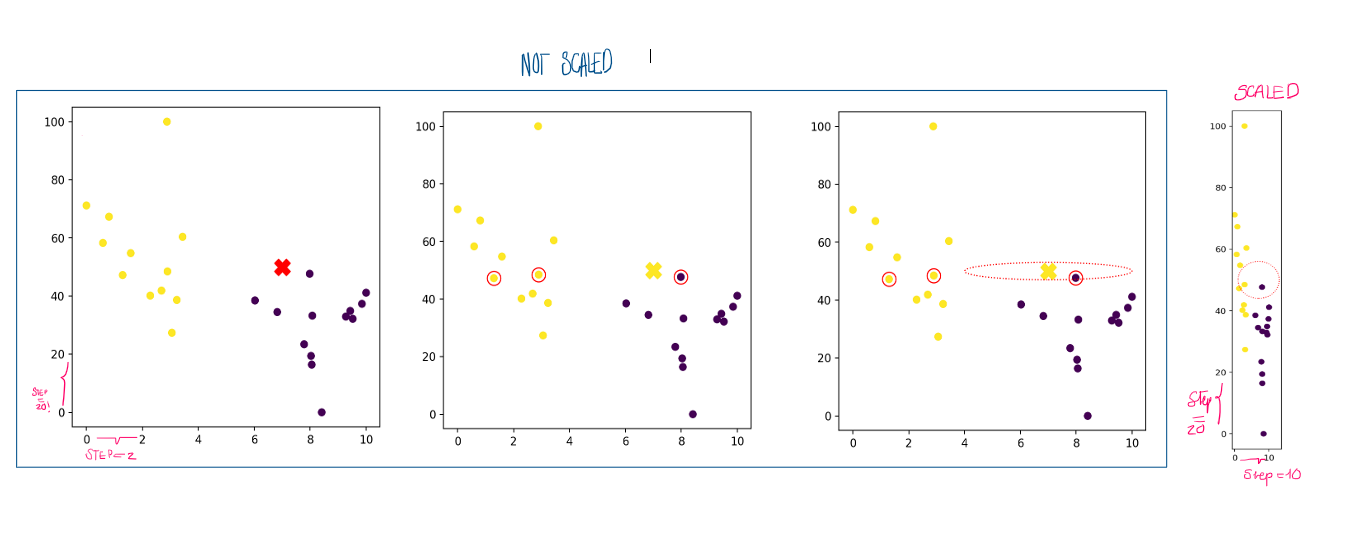

In [97]:
# training set
df_train = pd.read_csv('datos/datos05_train.csv')
X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

'''
dataset visualization
plt.figure(figsize=(5, 5))
plt.scatter(df_train['Variable1'], df_train['Variable2'], c=df_train['Clase'])
plt.title('datos05_train', family='monospace')
'''

#Lets add a new point. For that we will add  a single row (using a dataframe)
new_point = pd.DataFrame([[7, 50]], columns=X_train.columns) 
#A numpy array could also be used but it could be problematic since the model has been trained with a series of column names that this array wouldn't.
'''
plt.figure(figsize=(5, 5))
# original dataset points
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train, label = 'datos05_train')
# new point
plt.scatter(new_point['Variable1'],
            new_point['Variable2'], 
            c='red', marker='X', s=200, label='Nuevo')
plt.show()
'''

#CLASSIFICATION - NO PREPROCESING.
# MODEL TRAINING
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
# NEW EXAMPLE CLASSIFICATION
predicted_class = modelo.predict(new_point)
print("New point belongs to :", predicted_class)

# Finding the indexes of the points closest neighbors 
indices = modelo.kneighbors(new_point, n_neighbors = 3, return_distance=False) 
print(indices)
print(X_train.iloc[indices[0]])


'''

# visualization - NO SCALING
plt.figure(figsize=(5, 5))

# highlighting closest neighbors.
plt.scatter(X_train.loc[indices[0], 'Variable1'], 
            X_train.loc[indices[0], 'Variable2'],  
            marker='o', s=150, label='Nearest Neighbors', 
            edgecolor = 'red', c = 'white')

# visualization
plt.scatter(df_train['Variable1'], 
            df_train['Variable2'], 
            c=df_train['Clase'], 
            label = 'datos05_train')

# visualization (new point)
plt.scatter(new_point['Variable1'], 
            new_point['Variable2'], 
            c=predicted_class,  marker='X', 
            s=200, label='Nuevo', vmin=0, vmax=1)


plt.show()

#Visualization AFTER scaling data.
plt.figure(figsize=(1, 10))
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train,  marker='o')
circle = plt.Circle(new_point.to_numpy().ravel(), 6, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
 '''

New point belongs to : [1.]
[[21 16 17]]
    Variable1  Variable2
21   7.982266  47.658696
16   2.897759  48.476780
17   1.295575  47.225658


"\n\n# visualization - NO SCALING\nplt.figure(figsize=(5, 5))\n\n# highlighting closest neighbors.\nplt.scatter(X_train.loc[indices[0], 'Variable1'], \n            X_train.loc[indices[0], 'Variable2'],  \n            marker='o', s=150, label='Nearest Neighbors', \n            edgecolor = 'red', c = 'white')\n\n# visualization\nplt.scatter(df_train['Variable1'], \n            df_train['Variable2'], \n            c=df_train['Clase'], \n            label = 'datos05_train')\n\n# visualization (new point)\nplt.scatter(new_point['Variable1'], \n            new_point['Variable2'], \n            c=predicted_class,  marker='X', \n            s=200, label='Nuevo', vmin=0, vmax=1)\n\n\nplt.show()\n\n#Visualization AFTER scaling data.\nplt.figure(figsize=(1, 10))\nplt.scatter(X_train['Variable1'], \n            X_train['Variable2'], \n            c=y_train,  marker='o')\ncircle = plt.Circle(new_point.to_numpy().ravel(), 6, fill=False, linestyle='dotted', edgecolor='red')\nplt.gca().add_patch(circl

## Standarization of variables
We should standarize all variables so they all share the same mean and standar deviation, in order to avoid different scaled variables to interefere on the computing of the likeness (distance) between neighbors.

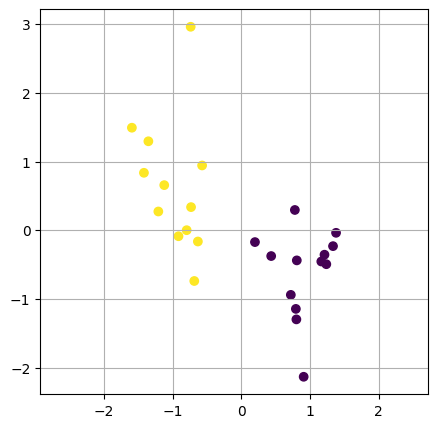

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#This object learns which transformations to perform by analyzing training data.
#Then it classifies the variables in ranges.
X_train_scaled = scaler.fit_transform(X_train) 

#Standarized variables.
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, marker='o')
plt.axis('equal')
plt.grid(True)
plt.show()

#### IT'S CRUCIAL TO STANDARIZE TESTING DATA TOO.
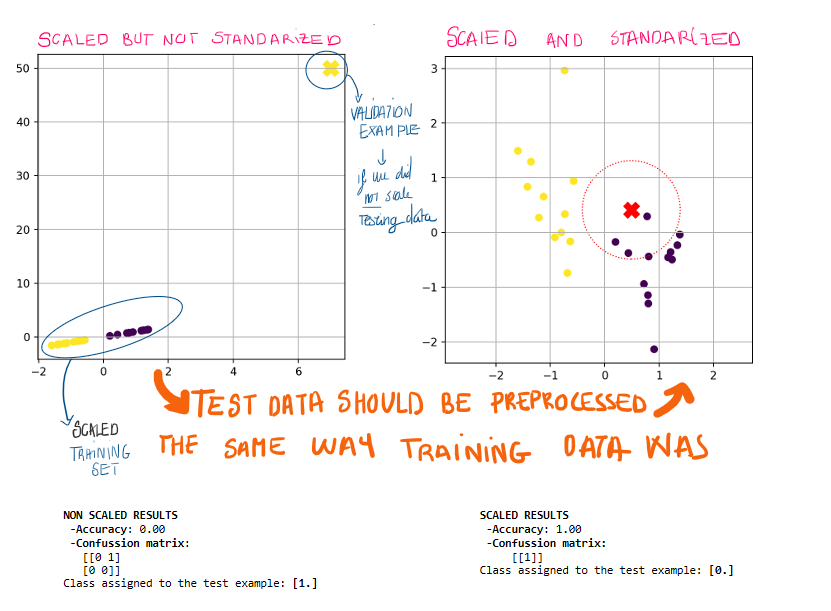

For that we will use the same scaler object, and we'll call transform() over the training set used to create the sacaler.


In [99]:

X_test = new_point
#SCALING TEST DATA (IN THIS EXAMPLE IS JUST A SINGLE POINT.)
X_test_scaled = scaler.transform(X_test)
'''
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='red', marker='X', s=200) 
plt.axis('equal')
plt.grid(True)
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='red', marker='X', s=200, label='New Point (6, 60)') 
plt.axis('equal')
plt.grid(True)

circle = plt.Circle(X_test_scaled[0], 0.9, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 

'''
print("NON SCALED RESULTS  ")
model, y_pred = train_and_get_accuracy(X_train, y_train, X_test, np.array([0]))
#Y_TRAIN = NP.ARRAY[0] BECAUSE WE ARE TESTING USING A RANDOM POINT , NOT A DATAFRAME WITH DIFERENT COLUMNS!!!!!!!!!
print("Class assigned to the test example:")
print(y_pred)

print("SCALED RESULTS ")
model, y_pred = train_and_get_accuracy(X_train_scaled, y_train, X_test_scaled, np.array([0]))
print("Class assigned to the test example:")
print(y_pred)


NON SCALED RESULTS  
Accuracy: 0.00
Confussion matrix:
 [[0 1]
 [0 0]]
Class assigned to the test example:
[1.]
SCALED RESULTS 
Accuracy: 1.00
Confussion matrix:
 [[1]]
Class assigned to the test example:
[0.]


c:\Users\Sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### Exercise
Load the fifth dataset training set and use it to evaluate the model. 
See how the model behaves when scaled and when not.

In [100]:
#loading the test data
df_test = pd.read_csv('datos/datos05_test.csv')
X_test = df_test[['Variable1', 'Variable2']]
y_test = df_test['Clase']
 

print("NON  scaled model results")

model, predicted_class=train_and_get_accuracy(X_train, y_train, X_test, y_test)
print(predicted_class)



print("SCALED model results")
X_test_scaled = scaler.transform(X_test) #WE SCALE THE DATASET USING THE TRANSFORM OBJECT.

model, predicted_class=train_and_get_accuracy(X_train_scaled,y_train, X_test_scaled,y_test)
print(predicted_class)

NON  scaled model results
Accuracy: 1.00
Confussion matrix:
 [[5 0]
 [0 5]]
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
SCALED model results
Accuracy: 1.00
Confussion matrix:
 [[5 0]
 [0 5]]
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]


### CATEGORICAL VARIABLES & KNN.
KNN DOES NOT HANDLE CATEGORICAL VARIABLES. We need to transform the data into numeric values.


In [101]:
# categorical variable set.

df_train = pd.read_csv('datos/datos06_train.csv')

print(df_train)
df_train.info()

#We extract the data.
X_train = df_train.drop('Etiqueta', axis=1)
y_train = df_train['Etiqueta']





  varCategorica  varNumerica1  varNumerica2 Etiqueta
0             A            10           1.1  Clase 0
1             B            15           3.2  Clase 1
2             A            20           1.3  Clase 0
3             B            25           2.4  Clase 1
4             C            30           6.5  Clase 2
5             C            35           2.6  Clase 2
6             A            40           2.7  Clase 0
7             B            45           1.8  Clase 1
8             C            50           5.9  Clase 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   varCategorica  9 non-null      object 
 1   varNumerica1   9 non-null      int64  
 2   varNumerica2   9 non-null      float64
 3   Etiqueta       9 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 420.0+ bytes


With < select_dtypes(include=[' < TYPE> ']).columns.tolist() > we can separate variables by type.

In [102]:

# categorical variables - Type =object
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
# numeric variables
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()



print("Categorical variables; ", categorical_features)
print("Numerical variables: ", numeric_features)

Categorical variables;  ['varCategorica']
Numerical variables:  ['varNumerica1', 'varNumerica2']


we observe that the original NUMERIC  variables need to be scaled.

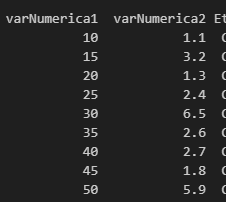

IF WE, FOR SOME REASON ,  DID NOT WANTED TO PREPROCESS VARIABLES we could use 'passthrough'

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

#Apply transformations to the original variables.
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed

array([[-1.54919334, -1.08526249,  1.        ,  0.        ,  0.        ],
       [-1.161895  ,  0.08016143,  0.        ,  1.        ,  0.        ],
       [-0.77459667, -0.97426974,  1.        ,  0.        ,  0.        ],
       [-0.38729833, -0.36380959,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  1.91154189,  0.        ,  0.        ,  1.        ],
       [ 0.38729833, -0.25281683,  0.        ,  0.        ,  1.        ],
       [ 0.77459667, -0.19732045,  1.        ,  0.        ,  0.        ],
       [ 1.161895  , -0.69678785,  0.        ,  1.        ,  0.        ],
       [ 1.54919334,  1.57856362,  0.        ,  0.        ,  1.        ]])

##### AGAIN , WE NEED TO APPLY ALL THE PREPROCESSING INTO THE TESTING DATA SET TOO.

In [104]:
#We load test data
df_test = pd.read_csv('datos/datos06_test.csv')
X_test = df_test.drop('Etiqueta', axis=1)
y_test = df_test['Etiqueta']
X_test
# Applying transformations to the testing dataset.
X_test_processed = preprocessor.transform(X_test)
X_test_processed

#We train the model
modelo, predicted_class= train_and_get_accuracy(X_train_processed, y_train, X_test_processed, y_test)
predicted_class

Accuracy: 0.89
Confussion matrix:
 [[3 0 0]
 [0 3 0]
 [1 0 2]]


array(['Clase 0', 'Clase 1', 'Clase 0', 'Clase 1', 'Clase 2', 'Clase 0',
       'Clase 0', 'Clase 1', 'Clase 2'], dtype=object)

### MISSING VALUES
Also known as data imputation, is the process of replacing missing values with some data. 
This is required for some algorithms that do not work with unknown values.

we will use sklearn's simpleImputer. (imputing strategies in : [https://scikit-learn.org/stable/modules/imputehtml#:~:text=Missing%20values%20can%20be%20imputedfor%20different%20missing%20values%20encodings]

In [105]:
from sklearn.impute import SimpleImputer


#### Numeric variables


In [106]:

imp = SimpleImputer(
    missing_values=np.nan, # default - we replace the values (nAn) with the mean of the dataset.
    strategy='mean')

print(
imp.fit_transform([   [1,         2], 
            [np.nan,    3], 
            [7,         6]
        ]))

# IN CASE WE WANTED TO APPLY THE SAME INPUTATION INTO ANOTHER DATASET, WE COULD!
print(
imp.transform([   [np.nan,        2], 
        [6,        np.nan], 
        [7,             6]
    ]))

[[1. 2.]
 [4. 3.]
 [7. 6.]]
[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


#### Categorical variables

In [107]:
import pandas as pd


df = pd.DataFrame([ ["a",        "x"],
                    [np.nan,     "y"],
                    ["a",     np.nan],
                    ["b",        "y"]], 
                    dtype="category")

imp = SimpleImputer(strategy="most_frequent") # We replace missing values with the one that repeats the most. y in this case.

print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


##### Exercise 
Impute the data stored in de seventh dataset, where missing values are identified as -1.

In [108]:

imp = SimpleImputer(
    missing_values=-1, 
    strategy='mean')

df_train=pd.read_csv("datos/datos07_train.csv")
df_train
#It has four numeric variables.
X_train=df_train[['Variable1','Variable2','Variable3','Variable4']]
 

print(imp.fit_transform(df_train))


#after using the mean as the imputing strategy all variables get decimals.
df_test=pd.read_csv("datos/datos07_test.csv")

#we need to transform TEST DATA TOO

X_test=df_test[['Variable1','Variable2','Variable3','Variable4']]
 
print(imp.fit_transform(df_test))

#NOTICE that these datasets are not meant to actually train a model since they do not have classes.




[[52.         93.         15.         72.        ]
 [52.5625     41.         49.25        7.        ]
 [52.5625     60.         80.         40.03225806]
 [52.5625     75.         92.         40.03225806]
 [76.         58.         22.         89.        ]
 [73.         72.         49.25       34.        ]
 [60.         41.         49.25       40.03225806]
 [86.         52.83333333 35.         65.        ]
 [ 1.          5.         90.         14.        ]
 [62.         57.          6.         40.03225806]
 [39.         52.83333333  4.         89.        ]
 [60.         14.          9.         90.        ]
 [27.          9.         79.         40.03225806]
 [60.         71.         44.          8.        ]
 [99.         47.         78.          3.        ]
 [90.         42.         77.         51.        ]
 [62.         62.         47.         62.        ]
 [51.         55.         64.          3.        ]
 [88.         37.         99.         44.        ]
 [ 9.         52.83333333  1.  

### Validation strategies

We dont usually get to have two different datasets, but one we have to divide into subgroups in order to obtain validation and training subsets.



In [109]:
#we load the eighth dataset
df=pd.read_csv("datos/datos08_train.csv")
#--print(df)
#print(df.info())

#print(df.describe())#in order to see how numeric variables behave.

# Separating variables (X) from tags (y)
X = df.drop('Clase', axis = 1)
y = df['Clase']



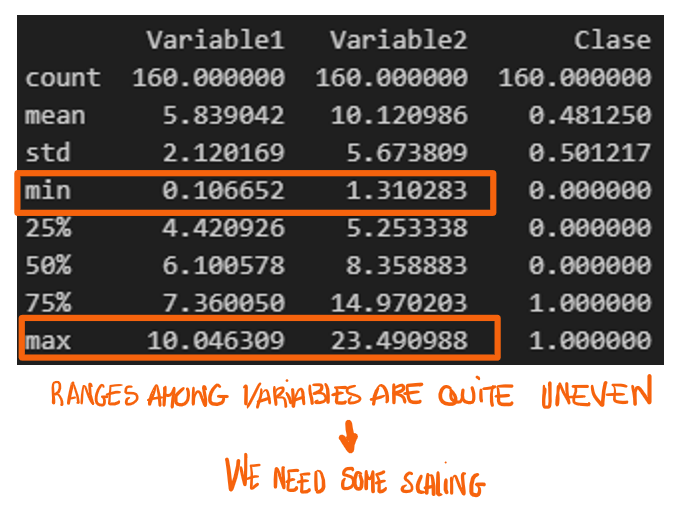

In [110]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
# data visualization

plt.figure(figsize=(5, 5))

plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=y)
plt.title('datos08', family='monospace')
plt.gca().set_aspect('equal', adjustable='box')

plt.show() 

'''



"\n# data visualization\n\nplt.figure(figsize=(5, 5))\n\nplt.scatter(X_scaled[:, 0], \n            X_scaled[:, 1], \n            c=y)\nplt.title('datos08', family='monospace')\nplt.gca().set_aspect('equal', adjustable='box')\n\nplt.show() \n\n"

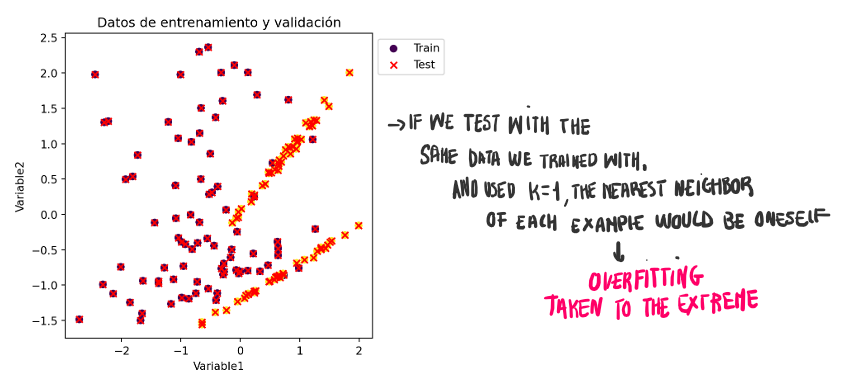


# Dataset division
We could use sklearn's train_test_split.


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                test_size=0.2, random_state=112)

original_distribution=y.value_counts()/y.size #~% of examples from each class
#After division of train and test data
#print('Train percentages')
#print(y_train.value_counts()/y_train.size)
#print('Test percentages')
#print(y_test.value_counts()/y_test.size)


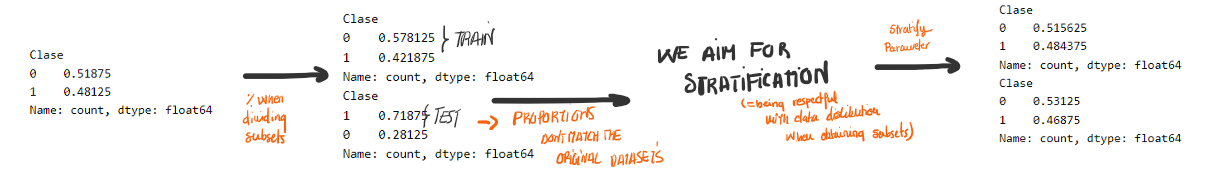

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                test_size=0.2, random_state=112, 
                stratify = y)#WE PASS  THE ORIGINAL DISTRIBUTION as stratify's value.

Now, even when we use k=1, RESULTS ARE NOT PERFECT. The model is not using the same element as a neighbor.

STILL , TEST DATA IS NOT ENTIRELY INDEPENDENT TO THE TRAINING PROCESS, SINCE IT WAS INVOLVED IN THE PREPORCESING OF DATA.

In [113]:
train_and_get_accuracy(X_train, y_train, X_test, y_test, k=1)

Accuracy: 0.91
Confussion matrix:
 [[15  2]
 [ 1 14]]


(KNeighborsClassifier(n_neighbors=3),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64))

### HOLDOUT VALIDATION
Simplest data division scheme. 

We divide a % of the data into a training set and the rest we use as the test set. 

Training data does not get involved in validation in any case.

In [114]:
# Dataset division.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, # percentage of data used for testing purposes only.
random_state=1, 
stratify = y)#Stratification to respect data distribution.

# learning which transformation does the train set need. 
#THIS IS THE MAIN DIFFERENCE WITH SIMPLY DIVING INTO TEST AND TRAINING.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# applying the transformation to the test data too, since they will have the same shape.
X_test_scaled = scaler.transform(X_test)

print("Using k=1")
train_and_get_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=1)

print("Using k=3")
train_and_get_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=3)

Using k=1


Accuracy: 0.88
Confussion matrix:
 [[14  3]
 [ 1 14]]
Using k=3
Accuracy: 0.91
Confussion matrix:
 [[14  3]
 [ 0 15]]


(KNeighborsClassifier(n_neighbors=3),
 array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

CONS: HOLDOUT VALIDATION IS DEPENDENT OF THE QUALITY OF THE RANDOMLY SELECTED TRAINING SET. If we changed the training dataset , we might get better or worse performance classifying new data.

### CROSS VALIDATION

We divide the original dataset into k groups. Each one of them, will be used to train the model k -1 timesl, being that one left the one they are used as the validation set. 

That means, k models are created; one for each group.

In [115]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

df = pd.read_csv('datos/datos08_train.csv')
X = df.drop('Clase', axis = 1)
y = df['Clase']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creation of the model
model = KNeighborsClassifier(n_neighbors=3)


cv_scores = cross_val_score(model, 
                            X_scaled, 
                            y, 
                            cv=5, 
                            scoring='accuracy')

# Display results
print("Cross validation results:", cv_scores)
print("Accuracy mean:", cv_scores.mean())

#----------------- CROSS VALIDATION - TECHNIQUES

 
model  = KNeighborsClassifier(n_neighbors=1)

# Specifying that we are using cross validation.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#StatifiedKFold ensures that data distribution is kept among sets.
print(cv)

 
cv_scores = cross_val_score(model  , X_scaled, y, cv=cv, scoring='accuracy')

print("Cross validation results:", cv_scores)
print("Accuracy mean:", cv_scores.mean())


# Inspecting the cross validation object to see how partitions where created.
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    print(f"\n Fold {fold + 1}:")

    print("Training set Indices:\n ", train_idx)
    print("Validation set Indices:\n", val_idx)

    # Split data extraction
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

 
    print("Training set dim:\n", X_train_fold.shape)
    print("Validation set dim:\n", X_val_fold.shape)
    print("training set class distribution:\n")
    print(y_train_fold.value_counts())
    print("validation set class distribution:\n ")
    print(y_val_fold.value_counts())

Cross validation results: [0.90625 0.9375  0.9375  0.9375  0.875  ]
Accuracy mean: 0.91875
StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
Cross validation results: [0.875   0.84375 0.96875 0.9375  0.9375 ]
Accuracy mean: 0.9125

 Fold 1:
Training set Indices:
  [  0   1   2   3   4   5   6   8   9  11  12  14  15  16  17  19  20  22
  25  27  28  29  31  32  33  34  35  36  37  38  39  40  42  43  44  45
  46  47  48  49  53  54  55  56  58  59  60  61  62  64  66  67  69  70
  71  72  73  74  76  77  79  80  81  82  83  85  86  87  88  89  91  93
  94  96  97  98  99 100 101 102 104 105 107 108 109 110 111 112 113 114
 115 117 118 119 120 121 122 123 125 126 127 128 129 130 131 133 134 135
 136 137 138 140 141 142 144 145 146 147 148 149 152 153 154 155 156 157
 158 159]
Validation set Indices:
 [  7  10  13  18  21  23  24  26  30  41  50  51  52  57  63  65  68  75
  78  84  90  92  95 103 106 116 124 132 139 143 150 151]
Training set dim:
 (128, 2)
Validation set dim:
 (